In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import holoviews as hv
import numpy as np
hv.config(future_deprecations=True)
import hvplot.pandas
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers
pio.renderers.default = "notebook_connected"
%matplotlib inline

In [2]:
with open('../output/bl_ct.csv', "r") as bl:
    df_bl = pd.read_csv(bl)
with open('../output/bl_ct2.csv', "r") as bl2:
    df_bl_c = pd.read_csv(bl2)
with open('../output/yelp_ct.csv', "r") as y:
    df_y = pd.read_csv(y)

In [3]:
shape_map = gpd.read_file('../data/Philadelphia_Census_Tracts_2010/Philadelphia_Census_Tracts_2010.shp')
gdf = shape_map.to_crs(epsg=4326)  

df_bl['tractid'] = df_bl.apply(lambda x: str(int(x.census)), axis=1)
df_bl_c['tractid'] = df_bl_c.apply(lambda x: str(int(x.census)), axis=1)
df_y['tractid'] = df_y.apply(lambda x: str(int(x.tract)), axis=1)
gdf['tractid'] =gdf.apply(lambda x: str(int(x.TRACTCE10)) , axis=1)
df0=gdf.merge(df_y, on='tractid')
df_b0=gdf.merge(df_bl, on='tractid')
df_b1=gdf.merge(df_bl_c, on='tractid')

df1 = df_y[['tractid' , 'New open' , 'Close-down','post_covid']]
df1 = df1.groupby(['tractid','post_covid']).mean(['New open','Close-down'])
df1.reset_index(inplace=True)
df1=gdf.merge(df1, on='tractid')
df2 = df_bl[['tractid' , 'New open' , 'post_covid']]
df2 = df2.groupby(['tractid','post_covid']).mean('New open')
df2.reset_index(inplace=True)
df2=gdf.merge(df2, on='tractid')
df3 = df_bl_c[['tractid' , 'Close-down' , 'post_covid']]
df3 = df3.groupby(['tractid','post_covid']).mean('Close-down')
df3.reset_index(inplace=True)
df3=gdf.merge(df3, on='tractid')

In [ ]:
df1.to_file('../output/shp/df.shp')

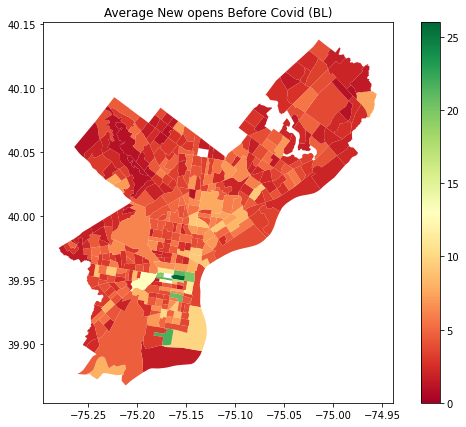

In [4]:
fig, ax = plt.subplots(1, 1,figsize=(10,7),facecolor='w')
df2[df2.post_covid==0].plot(column='New open',cmap='RdYlGn',ax=ax, legend=True,vmin=0,vmax=26)
ax.set_title('Average New opens Before Covid (BL)')
plt.savefig('../output/map_bl_open_before.png')
plt.show()

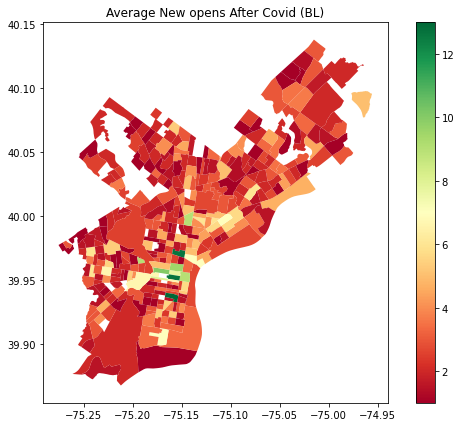

In [5]:
fig, ax = plt.subplots(1, 1,figsize=(10,7),facecolor='w')
df2[df2.post_covid==1].plot(column='New open',cmap='RdYlGn',ax=ax, legend=True)
ax.set_title('Average New opens After Covid (BL)')
plt.savefig('../output/map_bl_open_after.png')
plt.show()

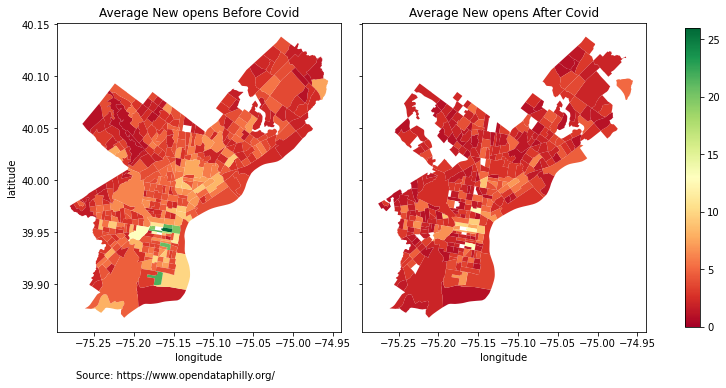

In [6]:
fig, axs = plt.subplots(1,2, figsize=(10,7), 
                        facecolor='w',
                        constrained_layout=True, 
                        sharex=True, sharey=True, 
                        subplot_kw=dict(aspect='equal'))
axs = axs.ravel()
for index in [0,1]:
    if index==0:
        axs[index].set_title('Average New opens Before Covid')
        axs[index].set_ylabel('latitude')
    else: 
        axs[index].set_title('Average New opens After Covid')
    axs[index].set_xlabel('longitude')
    df2[df2.post_covid==index].plot(column='New open', ax=axs[index],cmap='RdYlGn', vmin=0,vmax=26)
patch_col = axs[0].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.6)
plt.figtext(0.5, 0.01, "Source: https://www.opendataphilly.org/",position=(0.1,0.1))
plt.savefig('../output/map_bl_open.png')

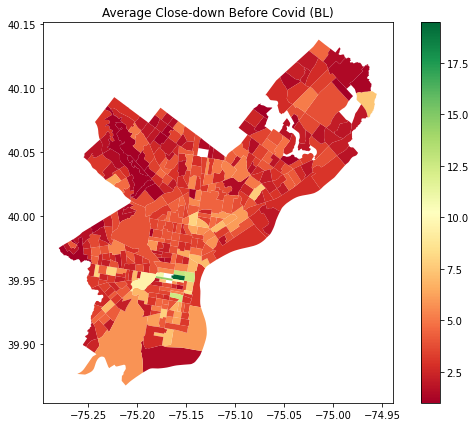

In [7]:
fig, ax = plt.subplots(1, 1,figsize=(10,7),facecolor='w')
df3[df3.post_covid==0].plot(column='Close-down',cmap='RdYlGn',ax=ax, legend=True)
ax.set_title('Average Close-down Before Covid (BL)')
plt.savefig('../output/map_bl_close_before.png')
plt.show()

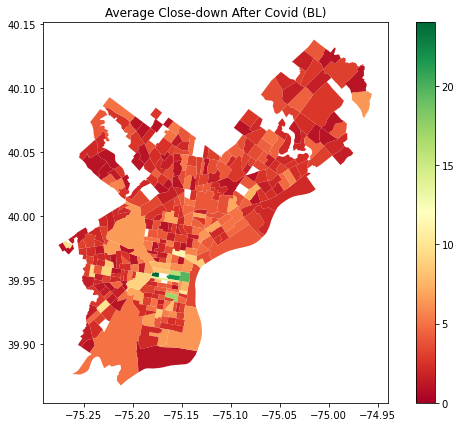

In [8]:
fig, ax = plt.subplots(1, 1,figsize=(10,7),facecolor='w')
df3[df3.post_covid==1].plot(column='Close-down',cmap='RdYlGn',ax=ax, legend=True, vmin=0,vmax=24)
ax.set_title('Average Close-down After Covid (BL)')
plt.savefig('../output/map_bl_close_after.png')
plt.show()

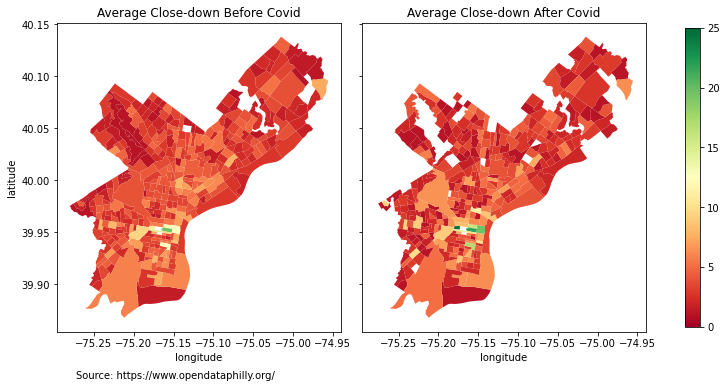

In [9]:
fig, axs = plt.subplots(1,2, figsize=(10,7), 
                        facecolor='w',
                        constrained_layout=True, 
                        sharex=True, sharey=True, 
                        subplot_kw=dict(aspect='equal'))
axs = axs.ravel()
for index in [0,1]:
    if index==0:
        axs[index].set_title('Average Close-down Before Covid')
        axs[index].set_ylabel('latitude')
    else: 
        axs[index].set_title('Average Close-down After Covid')
    axs[index].set_xlabel('longitude')
    df3[df3.post_covid==index].plot(column='Close-down', ax=axs[index],cmap='RdYlGn', vmin=0,vmax=25)

patch_col = axs[1].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.6)
plt.figtext(0.5, 0.01, "Source: https://www.opendataphilly.org/",position=(0.1,0.1))
plt.savefig('../output/map_bl_close.png')

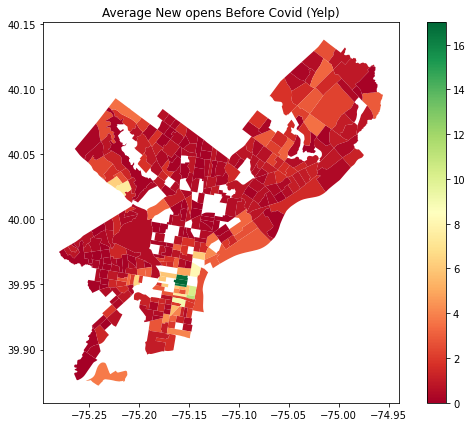

In [10]:
fig, ax = plt.subplots(1, 1,figsize=(10,7),facecolor='w')
df1[df1.post_covid==0].plot(column='New open',cmap='RdYlGn',ax=ax, legend=True, vmin=0,vmax=17)
ax.set_title('Average New opens Before Covid (Yelp)')
plt.savefig('../output/map_yelp_open_before.png')
plt.show()

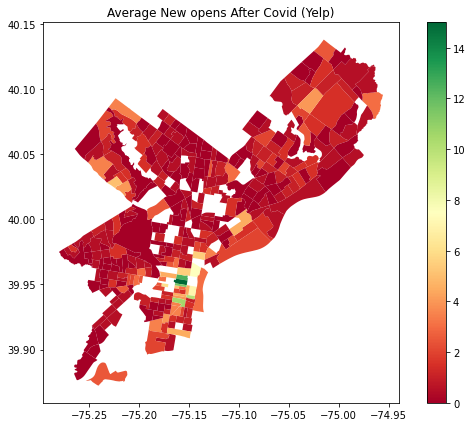

In [11]:
fig, ax = plt.subplots(1, 1,figsize=(10,7),facecolor='w')
df1[df1.post_covid==1].plot(column='New open',cmap='RdYlGn',ax=ax, legend=True, vmin=0,vmax=15)
ax.set_title('Average New opens After Covid (Yelp)')
plt.savefig('../output/map_yelp_open_after.png')
plt.show()

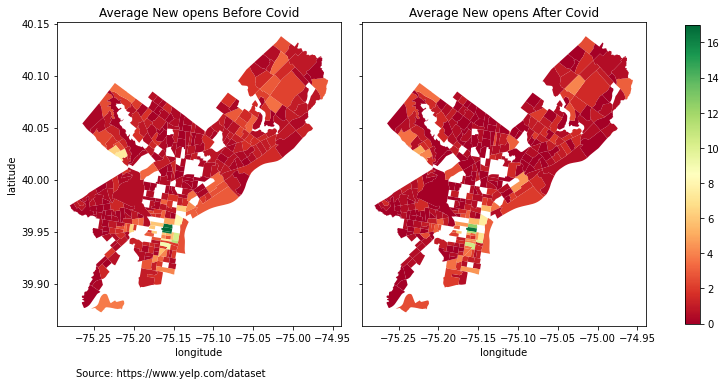

In [12]:
fig, axs = plt.subplots(1,2, figsize=(10,7), 
                        facecolor='w',
                        constrained_layout=True, 
                        sharex=True, sharey=True, 
                        subplot_kw=dict(aspect='equal'))
axs = axs.ravel()
for index in [0,1]:
    if index==0:
        axs[index].set_title('Average New opens Before Covid')
        axs[index].set_ylabel('latitude')
    else: 
        axs[index].set_title('Average New opens After Covid')
    axs[index].set_xlabel('longitude')
    df1[df1.post_covid==index].plot(column='New open', ax=axs[index],cmap='RdYlGn', vmin=0,vmax=17)
    
patch_col = axs[0].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.6)
plt.figtext(0.5, 0.01, "Source: https://www.yelp.com/dataset",position=(0.1,0.1))

plt.savefig('../output/map_yelp_open.png')

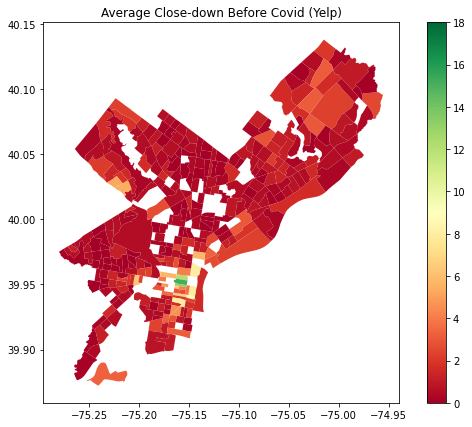

In [13]:
fig, ax = plt.subplots(1, 1,figsize=(10,7),facecolor='w')
df1[df1.post_covid==0].plot(column='Close-down',cmap='RdYlGn',ax=ax, legend=True,vmin=0,vmax=18)
ax.set_title('Average Close-down Before Covid (Yelp)')
plt.savefig('../output/map_yelp_close_before.png')
plt.show()

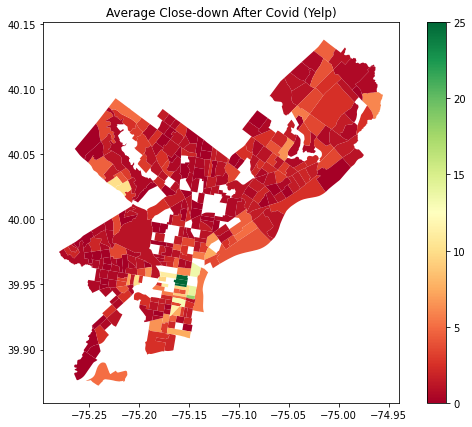

In [14]:
fig, ax = plt.subplots(1, 1,figsize=(10,7),facecolor='w')
df1[df1.post_covid==1].plot(column='Close-down',cmap='RdYlGn',ax=ax, legend=True,vmin=0,vmax=25)
ax.set_title('Average Close-down After Covid (Yelp)')
plt.savefig('../output/map_yelp_close_after.png')
plt.show()

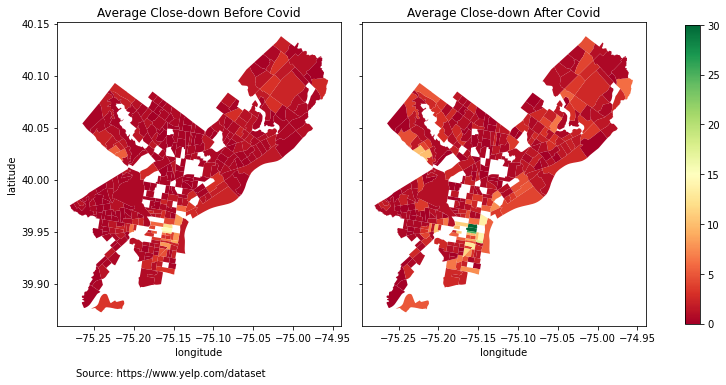

In [15]:
fig, axs = plt.subplots(1,2, figsize=(10,7), 
                        facecolor='w',
                        constrained_layout=True, 
                        sharex=True, sharey=True, 
                        subplot_kw=dict(aspect='equal'))
axs = axs.ravel()
for index in [0,1]:
    if index==0:
        axs[index].set_title('Average Close-down Before Covid')
        axs[index].set_ylabel('latitude')
    else: 
        axs[index].set_title('Average Close-down After Covid')
        
    axs[index].set_xlabel('longitude')
    df1[df1.post_covid==index].plot(column='Close-down', ax=axs[index],cmap='RdYlGn', vmin=0,vmax=30)
    

patch_col = axs[1].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.6)

plt.figtext(0.5, 0.01, "Source: https://www.yelp.com/dataset",position=(0.1,0.1))

plt.savefig('../output/map_yelp_close.png')

In [59]:
groupbyyear = df0.groupby(['year','is_cbd'])['New open','Close-down'].mean()
groupbyyear.reset_index(inplace=True)

In [60]:
df0_g=groupbyyear.pivot(index='year', columns='is_cbd', values=['New open','Close-down']).reset_index()
df0_g.columns = df0_g.columns.to_flat_index()
df0_g.rename({('year', ''):'year',('New open', 0):'New Open in non-CBD',
            ('New open', 1): 'New Open in CBD', ('Close-down', 0):'Close-down in non-CBD',
            ('Close-down', 1):'Close-down in CBD'
},axis=1,inplace=True)

In [61]:
df0_g[df0_g.year>=2007].hvplot(x='year', y=['New Open in non-CBD', 'New Open in CBD'],
             value_label='Business Count')        

:NdOverlay   [Variable]
   :Curve   [year]   (Business Count)

In [47]:
m  =df0.groupby('year')['New open','Close-down'].mean()
m.hvplot(x='year', y=['New open', 'Close-down'],
             value_label='Business Count')  

:NdOverlay   [Variable]
   :Curve   [year]   (Business Count)

In [52]:
df0_g['New Open in CBD'] = df0_g['New Open in CBD']-4

In [58]:
df0_g[df0_g.year<2021].hvplot(x='year', y=['New Open in non-CBD', 'New Open in CBD'],
             value_label='Business Count')        

:NdOverlay   [Variable]
   :Curve   [year]   (Business Count)

In [19]:
df0_g['Close-down in CBD'] = df0_g['Close-down in CBD']-0.5

In [20]:
df0_g.hvplot(x='year', y=['Close-down in non-CBD', 'Close-down in CBD'],
             value_label='Business Count')   

:NdOverlay   [Variable]
   :Curve   [year]   (Business Count)

In [63]:
groupbyyear0 = df_b0.groupby('year')['New open'].sum()
groupbyyear1 = df_b1.groupby('year')['Close-down'].sum()
groupbyyear = pd.DataFrame(groupbyyear0).merge(pd.DataFrame(groupbyyear1), on ='year')
groupbyyear.reset_index(inplace=True)
# smooth the outlier
a = int(groupbyyear[groupbyyear.year==2011]['Close-down'])
b = int(groupbyyear[groupbyyear.year==2013]['Close-down'])
groupbyyear.loc[groupbyyear.year==2012,'Close-down'] = np.mean([a,b])
groupbyyear[groupbyyear.year!=2022].hvplot(x='year', y=['New open','Close-down'],
             value_label='Business Count')

:NdOverlay   [Variable]
   :Curve   [year]   (Business Count)

<AxesSubplot:>

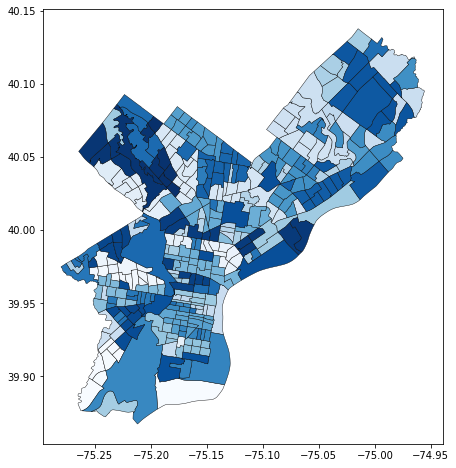

In [62]:
gdf.plot(figsize=(16,8), cmap='Blues', edgecolor='black', linewidth=0.4)